## Problem 1. Clustering with the k-Means algorithm

In [69]:
import numpy as np
import random as rd

In [70]:
# Problem 1 (a)
def euclidean_distance(a, b):
    """ 
    Takes two vectors and returns the Euclidean distance between them 
    Input: a - input vector a
           b - input vector b
    Output: the Euclidean distance between vectors a and b
    """
    vector_sum = np.sum((a-b) ** 2)
    return np.sqrt(vector_sum)
    
    # TODO: Write your solution here

In [71]:
# Problem 1 (b)
def kmeans(X, K, max_iter=100, tol=0.00005, distance_metric=euclidean_distance):
    """
    K-Means clustering algorithm. 
    Input: X -         (comments are intentionally removed)
           K - 
           max_iter - 
           tol - 
           distance_metric - 
    Output: c -        (comments are intentionally removed)
            centroids - 
            log_centroids - 
            log_c - 
            log_sse - 
    """
    
    N, d = X.shape
    
    centroids = np.zeros((K, d))
    
    sse = np.Inf    # sum of squared error (objective)
    
    # for bookkeeping
    log_sse = []
    log_c = []
    log_centroids = []

    # initialization
    for k in range(K):
        rand_index = rd.randint(0, N-1)
        centroids[k] = X[rand_index]
#     log_centroids.append(centroids)
    
    # main process
    for i in range(max_iter):
        
        # update the cluster membership
        c = []
        for n in range(N):
            dist_to_centroids = []
            
            for k in range(K):
                dist_to_centroids.append(distance_metric(X[n], centroids[k]))
            
            c.append(np.argmin(dist_to_centroids)) # cluster membership
        log_c.append(c)
        
        # update the centroids
        prev_centroids = centroids  # bookkeeping
        centroids = np.zeros((K, d))
        for k in range(K):
            tmp_sum = np.zeros(d)
            tmp_count = 0
            for n in range(N):
                if c[n] == k:
                    tmp_sum += X[n]
                    tmp_count += 1
            centroids[k] = tmp_sum / tmp_count
        log_centroids.append(centroids)
        
        # estimate the sum of the squared errors (sse)
        prev_sse = sse  # bookkeeping
        sse = 0
        for n in range(N):
            sse += distance_metric(X[n], centroids[c[n]]) ** 2
        log_sse.append(sse)
        
        # stopping criterion
        if prev_sse - sse < tol:
            break
    
    return c, centroids, log_centroids, log_c, log_sse
    

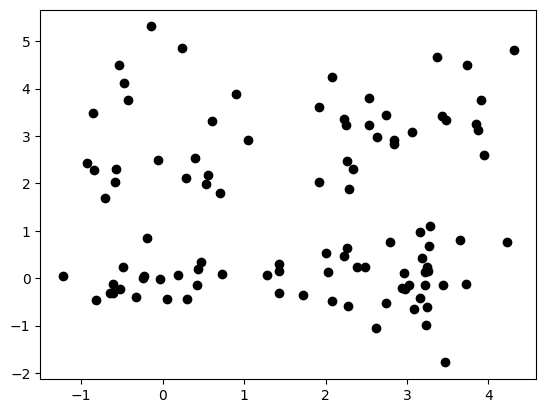

In [6]:
# Problem 1 (c)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

def generate_random_data(N=100):
    """ 
    Generate a random dataset (multivariate normal) 
    Input: N - number of instances to create
    Output: X - generated (synthetic) dataset
    """
    
    means = [[0, 0], [3, 3], [0, 3], [3, 0]]
    covs = [[[0.5, 0], [0, 0.1]], [[0.5, 0], [0, 0.5]], 
            [[0.5, 0], [0, 1.0]], [[0.3, 0], [0, 0.3]]]

    X = np.zeros((N, 2))
    for n in range(N):
        seed = rd.randint(0, 3)
        X[n] = np.random.multivariate_normal(means[seed], covs[seed])
    
    return X

X = generate_random_data()
plt.scatter(X[:,0], X[:,1], c='k')

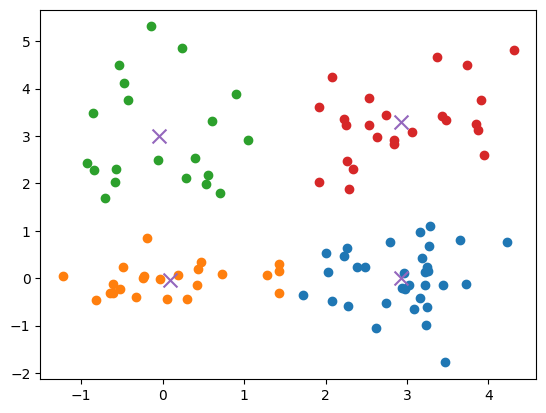

In [7]:
# Problem 3 (c) - part 1
""" TODO: Write your solution here """
K = 4
c, centroids, log_centroids, log_c, log_sse = kmeans(X, K, max_iter=100, tol=0.00005, distance_metric=euclidean_distance)

membership_0_x = []
membership_0_y = []
membership_1_x = []
membership_1_y = []
membership_2_x = []
membership_2_y = []
membership_3_x = []
membership_3_y = []

for i in range(len(X)):
    if(c[i] == 0):
        membership_0_x.append(X[i,0])
        membership_0_y.append(X[i,1])
    elif (c[i] == 1):
        membership_1_x.append(X[i,0])
        membership_1_y.append(X[i,1])
    elif (c[i] == 2):
        membership_2_x.append(X[i,0])
        membership_2_y.append(X[i,1])
    else:
        membership_3_x.append(X[i,0])
        membership_3_y.append(X[i,1])
        

plt.scatter(membership_0_x, membership_0_y)
plt.scatter(membership_1_x, membership_1_y)
plt.scatter(membership_2_x, membership_2_y)
plt.scatter(membership_3_x, membership_3_y)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=100)

plt.show()

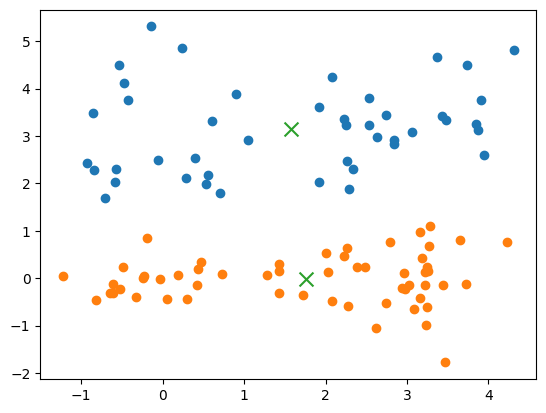

In [8]:
# Problem 3 (c) - part 2
""" TODO: Write your solution here """
K = 2
c, centroids, log_centroids, log_c, log_sse = kmeans(X, K, max_iter=100, tol=0.00005, distance_metric=euclidean_distance)

membership_0_x = []
membership_0_y = []
membership_1_x = []
membership_1_y = []

for i in range(len(X)):
    if(c[i] == 0):
        membership_0_x.append(X[i,0])
        membership_0_y.append(X[i,1])
    else:
        membership_1_x.append(X[i,0])
        membership_1_y.append(X[i,1])

plt.scatter(membership_0_x, membership_0_y)
plt.scatter(membership_1_x, membership_1_y)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=100)

plt.show()

In [9]:
# Problem 1 (d)
def normalize(X):
    """
    mean-std normalization (standardization)
    Takes and applies a normalization on the input matrix X
    Input: X - data matrix (numpy array)
    Output: X_normalized - normalized data matrix
    """
    return (X - X.mean(axis=0)) / X.std(axis=0)


my_data = np.genfromtxt('Mall_Customers.csv', delimiter=',', skip_header=1)
# print(my_data)
N, d = my_data.shape
print(N)
print(d)

from scipy import stats


stats.describe(normalize(my_data))

200
4


DescribeResult(nobs=200, minmax=(array([-1.12815215, -1.49633548, -1.73899919, -1.91002079]), array([0.88640526, 2.23553238, 2.91767117, 1.89449216])), mean=array([-5.99520433e-17, -4.94049246e-17, -3.73034936e-16, -1.06581410e-16]), variance=array([1.00502513, 1.00502513, 1.00502513, 1.00502513]), skewness=array([-0.24174689,  0.48191947,  0.31942368, -0.04686531]), kurtosis=array([-1.94155844, -0.68475139, -0.12589283, -0.83595827]))

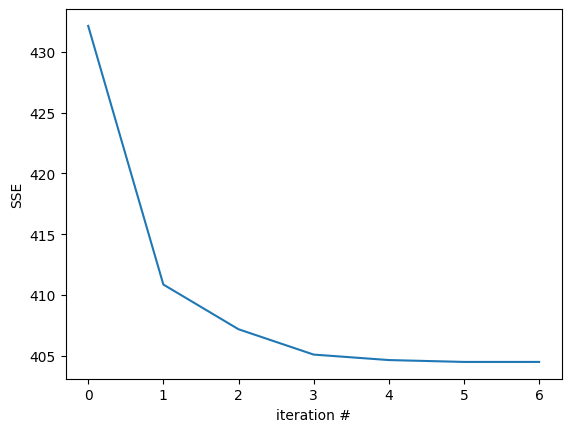

clustering result of all 200 data instances : 
[0, 0, 3, 0, 3, 0, 3, 0, 1, 0, 1, 0, 3, 0, 1, 0, 3, 0, 1, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 1, 3, 1, 3, 1, 0, 1, 1, 0, 3, 3, 1, 0, 3, 3, 0, 3, 1, 3, 3, 3, 4, 0, 3, 4, 0, 3, 4, 4, 4, 3, 0, 4, 3, 0, 0, 3, 3, 0, 4, 3, 3, 0, 3, 0, 4, 0, 0, 3, 4, 0, 4, 0, 3, 4, 4, 4, 4, 0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 2, 0, 4, 0, 4, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2]


In [32]:
# Problem 1 (e)
""" TODO: Write your solution here """
X = normalize(my_data)
K = 5
c, centroids, log_centroids, log_c, log_sse = kmeans(X, K, max_iter=100, tol=0.00005, distance_metric=euclidean_distance)

plt.plot(log_sse)
plt.xlabel('iteration #')
plt.ylabel('SSE')
plt.show()

print(f'clustering result of all 200 data instances : ')
print(c)

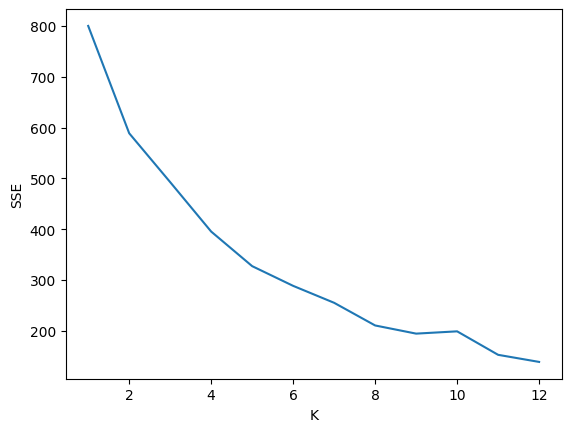

In [99]:
# Problem 1 (f)
""" TODO: Write your solution here """
c_save = []
centroids_save = []
log_centroids_save = []
log_c_save = []
log_sse_save = []

K = 1
for i in range(12):
    c, centroids, log_centroids, log_c, log_sse = kmeans(X, K, max_iter=100, tol=0.00005, distance_metric=euclidean_distance)
    c_save.append(c)
    centroids_save.append(centroids)
    log_centroids_save.append(log_centroids)
    log_c_save.append(log_c)
    log_sse_save.append(log_sse[-1])
    K = K+1

plt.plot(range(1,13),log_sse_save)
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

In [149]:
c_save = []
c, centroids, log_centroids, log_c, log_sse = kmeans(X, 8, max_iter=100, tol=0.00005, distance_metric=euclidean_distance)

membership_0_x = []
membership_1_x = []
membership_2_x = []
membership_3_x = []
membership_4_x = []
membership_5_x = []
membership_6_x = []
membership_7_x = []


for i in range(len(X)):
    if(c[i] == 0):
        membership_0_x.append(X[i,:])
    elif (c[i] == 1):
        membership_1_x.append(X[i,:])
    elif (c[i] == 2):
        membership_2_x.append(X[i,:])
    elif (c[i] == 3):
        membership_3_x.append(X[i,:])
    elif (c[i] == 4):
        membership_4_x.append(X[i,:])
    elif (c[i] == 5):
        membership_5_x.append(X[i,:])
    elif (c[i] == 6):
        membership_6_x.append(X[i,:])
    else:
        membership_7_x.append(X[i,:])
        

In [157]:
X = membership_0_x
print(f'[K = 8]')
print(f'- membership_1')
print(f'mean : ')
print(np.mean(X))
print(f'stadard deviation : ')
print(np.std(X))
print(f'median : ')
print(np.median(X))
print(f'minimum : ')
print(np.min(X))
print(f'maximum : ')
print(np.max(X))

X = membership_1_x
print(f'- membership_2')
print(f'mean : ')
print(np.mean(X))
print(f'stadard deviation : ')
print(np.std(X))
print(f'median : ')
print(np.median(X))
print(f'minimum : ')
print(np.min(X))
print(f'maximum : ')
print(np.max(X))

X = membership_2_x
print(f'- membership_3')
print(f'mean : ')
print(np.mean(X))
print(f'stadard deviation : ')
print(np.std(X))
print(f'median : ')
print(np.median(X))
print(f'minimum : ')
print(np.min(X))
print(f'maximum : ')
print(np.max(X))

X = membership_3_x
print(f'- membership_4')
print(f'mean : ')
print(np.mean(X))
print(f'stadard deviation : ')
print(np.std(X))
print(f'median : ')
print(np.median(X))
print(f'minimum : ')
print(np.min(X))
print(f'maximum : ')
print(np.max(X))

X = membership_4_x
print(f'- membership_5')
print(f'mean : ')
print(np.mean(X))
print(f'stadard deviation : ')
print(np.std(X))
print(f'median : ')
print(np.median(X))
print(f'minimum : ')
print(np.min(X))
print(f'maximum : ')
print(np.max(X))

X = membership_5_x
print(f'- membership_6')
print(f'mean : ')
print(np.mean(X))
print(f'stadard deviation : ')
print(np.std(X))
print(f'median : ')
print(np.median(X))
print(f'minimum : ')
print(np.min(X))
print(f'maximum : ')
print(np.max(X))

X = membership_6_x
print(f'- membership_7')
print(f'mean : ')
print(np.mean(X))
print(f'stadard deviation : ')
print(np.std(X))
print(f'median : ')
print(np.median(X))
print(f'minimum : ')
print(np.min(X))
print(f'maximum : ')
print(np.max(X))

X = membership_7_x
print(f'- membership_8')
print(f'mean : ')
print(np.mean(X))
print(f'stadard deviation : ')
print(np.std(X))
print(f'median : ')
print(np.median(X))
print(f'minimum : ')
print(np.min(X))
print(f'maximum : ')
print(np.max(X))

[K = 8]
- membership_1
mean : 
-0.08258198608968023
stadard deviation : 
0.973466935206334
median : 
-0.2503914553668266
minimum : 
-1.7008297638941756
maximum : 
1.8944921627227171
- membership_2
mean : 
-0.1370074724729699
stadard deviation : 
1.0834462469329038
median : 
-0.2503914553668266
minimum : 
-1.8323776655842676
maximum : 
2.235532383381568
- membership_3
mean : 
0.18644883335740234
stadard deviation : 
1.08069211010564
median : 
0.20234083766810235
minimum : 
-1.1281521496355336
maximum : 
2.9176711658902774
- membership_4
mean : 
-0.39632854556149005
stadard deviation : 
1.0874926727850487
median : 
-1.0610604008183242
minimum : 
-1.9100207870073298
maximum : 
2.9176711658902774
- membership_5
mean : 
0.39295832094536903
stadard deviation : 
0.8324322436523648
median : 
0.6656748447557095
minimum : 
-1.4963354797273096
maximum : 
2.497807445000782
- membership_6
mean : 
0.3875304721356087
stadard deviation : 
0.7478060475716023
median : 
0.5321491942089316
minimum : 
-1.7

In [107]:
print(X[1,:])

[-1.12815215 -1.28103541 -1.73899919  1.19570407]


In [48]:
# Problem 1 (g) - Extra point
""" TODO: You may copy the kmeans() function from Problem 1(b) to here
         and modify it from this cell """
def kmeans(X, K, max_iter=100, tol=0.00005, distance_metric=euclidean_distance):
    N, d = X.shape
    
    centroids = np.zeros((K, d))
    
    sse = np.Inf    # sum of squared error (objective)
    
    # for bookkeeping
    log_sse = []
    log_c = []
    log_centroids = []

    # initialization
    for k in range(K):
        rand_index = rd.randint(0, N-1)
        centroids[k] = X[rand_index]
#     log_centroids.append(centroids)
    
    # main process
    for i in range(max_iter):
        
        # update the cluster membership
        c = []
        for n in range(N):
            dist_to_centroids = []
            
            for k in range(K):
                dist_to_centroids.append(distance_metric(X[n], centroids[k]))
            
            c.append(np.argmin(dist_to_centroids)) # cluster membership
        log_c.append(c)
        
        # update the centroids
        prev_centroids = centroids  # bookkeeping
        centroids = np.zeros((K, d))
        for k in range(K):
            tmp_sum = np.zeros(d)
            tmp_count = 0
            for n in range(N):
                if c[n] == k:
                    tmp_sum += X[n]
                    tmp_count += 1
                    
            if tmp_count == 0:
                centroids[k] = prev_centroids[k]
            else:
                centroids[k] = tmp_sum / tmp_count
            
            #centroids[k] = tmp_sum / tmp_count
        log_centroids.append(centroids)
        
        # estimate the sum of the squared errors (sse)
        prev_sse = sse  # bookkeeping
        sse = 0
        for n in range(N):
            sse += distance_metric(X[n], centroids[c[n]]) ** 2
        log_sse.append(sse)
        
        # stopping criterion
        if prev_sse - sse < tol:
            break
    
    return c, centroids, log_centroids, log_c, log_sse

## Problem 2. Image segmentation using k-Means

In [59]:
!pip install opencv-python
import cv2


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


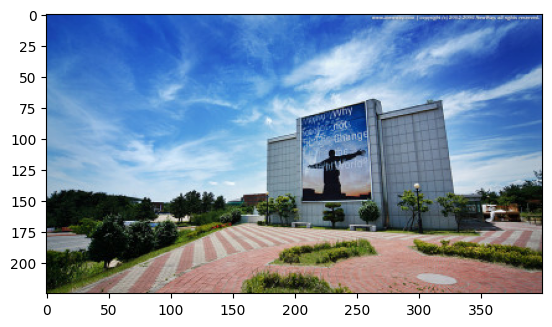

In [62]:
# Read an image file and convert it to an RGB image
img = cv2.imread('hyoam.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [63]:
# Convert the RGB image into an RGB matrix
X_rgb = np.float32(img.reshape((-1,3)))
print(X_rgb)

[[ 23.  61. 170.]
 [ 23.  61. 170.]
 [ 22.  63. 171.]
 ...
 [150.  94.  95.]
 [145.  94.  93.]
 [140.  99.  97.]]


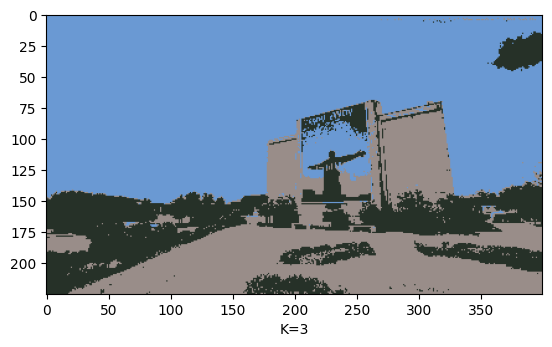

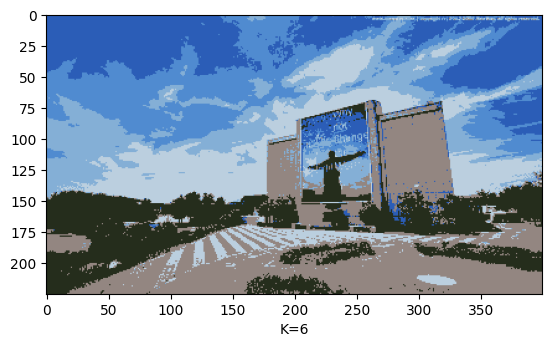

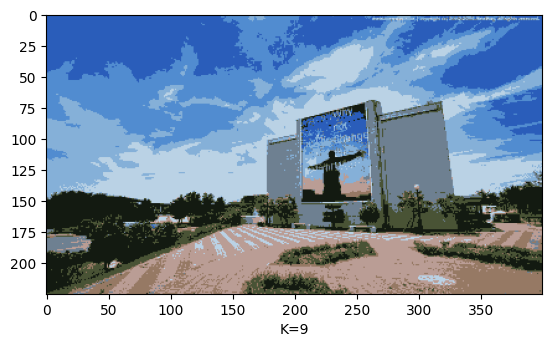

In [64]:
""" TODO: Perform an image segmentation using the provided kmeans algorithm and show your results when k = 3, 6, 9 """
K = 3
c, centroids, log_centroids, log_c, log_sse = kmeans(X_rgb, K, max_iter=100, tol=0.00005, distance_metric=euclidean_distance)

c_array = np.array(c) 
centroids_array = np.array(centroids)
centroids_array = np.uint8(centroids)
c_array = c_array.flatten()
segmented_image = centroids_array[c_array]
segmented_image = segmented_image.reshape(img.shape)

K = 6
c, centroids, log_centroids, log_c, log_sse = kmeans(X_rgb, K, max_iter=100, tol=0.00005, distance_metric=euclidean_distance)

c_array_6 = np.array(c) 
centroids_array_6 = np.array(centroids)
centroids_array_6 = np.uint8(centroids)
c_array_6 = c_array_6.flatten()
segmented_image_6 = centroids_array_6[c_array_6]
segmented_image_6 = segmented_image_6.reshape(img.shape)

K = 9
c, centroids, log_centroids, log_c, log_sse = kmeans(X_rgb, K, max_iter=100, tol=0.00005, distance_metric=euclidean_distance)

c_array_9 = np.array(c) 
centroids_array_9 = np.array(centroids)
centroids_array_9 = np.uint8(centroids)
c_array_9 = c_array_9.flatten()
segmented_image_9 = centroids_array_9[c_array_9]
segmented_image_9 = segmented_image_9.reshape(img.shape)

#plt.subplot(131)
plt.xlabel('K=3')
plt.imshow(segmented_image)
plt.show()

#plt.subplot(132)
plt.xlabel('K=6')
plt.imshow(segmented_image_6)
plt.show()

#plt.subplot(133)
plt.xlabel('K=9')
plt.imshow(segmented_image_9)
plt.show()



## Problem 3. Linear regression

In [ ]:
# Problem 3 supplements: Additional function(s) required for this assignment
def normalize_mv(X, mu=None, sigma=None):
    """
    Normalizes input matrix X.
    If mu and sigma are provided, this function normalizes X using them.
    Otherwise, the function first estimates mu and sigma from X, and then normalizes X.
    Input: X - input matrix
           mu - a vector of column-wise mean values (can be omitted)
           sigma - a vector of column-wise standard deviation values (can be omitted)
    Output: 
    """
    if mu is None and sigma is None:
        mu = X.mean(axis=0)
        sigma = X.std(axis=0)
    return (X - mu)/sigma, mu, sigma


def get_rmse(y_true, y_pred):
    """
    Measures the regression error using root-mean-square error (RMSE)
    Input: Y_true - true output (ground truth)
           Y_pred - predicted output
    return a floating point number representing RMSE
    """
    assert len(y_true) == len(y_pred)
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [ ]:
# Problem 3 supplements: Data preparation for Problem 3.
# load data
data_tr = np.genfromtxt('boston_houses_train.csv', delimiter=',', skip_header=1)
data_ts = np.genfromtxt('boston_houses_test.csv', delimiter=',', skip_header=1)

# normalization
X_tr, mu_tr, sigma_tr = normalize_mv(data_tr[:, :-1])
y_tr = data_tr[:, -1].astype(np.float64)
X_ts, _, _ = normalize_mv(data_ts[:, :-1], mu_tr, sigma_tr)
y_ts = data_ts[:, -1].astype(np.float64)

print(X_tr.shape)
print(y_tr.shape)
print(X_ts.shape)
print(y_ts.shape)

In [ ]:
# Problem 3 (a) - Implement compute_cost()
def compute_cost(X, y, w):
    """
    compute_cost (= compute the error function J(w,D))
    Input: X - Input attributes
           y - Target values
           w - model weights
    Output: cost computed given (X, y) and w (i.e., evaluation of function J())
    """
    
    # TODO: Complete this function

In [ ]:
# Problem 3 (a) - Your compute_cost() should work with the following functions
def gradient_descent(X, y, w, alpha, n_iters, threshold=1e-07):
    """
    gradient_descent
    Input: X, y, w, alpha, n_iters
    Output: 
    """
    N = len(y)
    log_j = []
    j_last = np.Inf

    for i in range(n_iters):
        w_new = w - (-2*alpha/N * X.T @ (y - X @ w))
        j_new = compute_cost(X, y, w)
        
        if j_last - j_new < threshold:
            break
            
        w = w_new
        log_j.append(j_new)
        j_last = j_new

    return w, log_j


def train_linreg(X_tr, y_tr, alpha=0.01, n_iters=1500):
    """
    train_linreg
    Input: X_tr - Training input attributes
           y_tr - Training target values
           alpha - learning rate alpha (default: 0.01)
           n_iters - number of iterations (default: 1500)
    Output: w_star - trained model weights
            log_j - cost history
    """
    N_tr, d_tr = X_tr.shape
    
    X_tr_b = np.hstack((X_tr, np.ones((N_tr, 1))))
    w_init = np.zeros(d_tr + 1)  # np.random.rand(d_tr + 1)
    
    initial_cost = compute_cost(X_tr_b, y_tr, w_init)
    print("Initial J(w_init, D_tr) is: ", initial_cost, "\n")
    
    w_star, log_j = gradient_descent(X_tr_b, y_tr, w_init, alpha, n_iters)
    
    print("w*: \n", w_star, "\n")
    print("J(w*, D_tr): ", log_j[-1])
    
    return w_star, log_j

In [ ]:
# Problem 3 (b) Execute this code cell, after implementing compute_cost(X, y, w)

Model_linreg, log_j_linreg = train_linreg(X_tr, y_tr, 0.005, 3000)

plt.plot(range(len(log_j_linreg)), log_j_linreg, 'r')
plt.title('learning_curve')
plt.ylabel('Cost')
plt.xlabel('#Iterations')
plt.show()

In [ ]:
# Problem 3 (c) Implement the predict_linreg(X, w) below.
def predict_linreg(X, w):
    """
    predict_linreg
    Input: X - Input attributes to predict the target output
           w - Trained model weights
    Output: y_pred - predicted target values
    """
    
    # TODO: Complete this function
    
    return y_pred

In [ ]:
# Problem 3 (d)
# prediction
y_tr_pred = predict_linreg(X_tr, Model_linreg)
y_ts_pred = predict_linreg(X_ts, Model_linreg)

# print out the results
print(get_rmse(y_tr, y_tr_pred))
print(get_rmse(y_ts, y_ts_pred))

# Draw scatter plots that compare true and predicted target values
# (blue dots for y_tr; oranges dots for y_ts)
plt.scatter(y_tr,y_tr_pred, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Training data')

plt.scatter(y_ts,y_ts_pred, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Testing data')

plt.axline((-100, -100), (100, 100), c='grey', lw=1)
plt.ylim(-10, 55)
plt.xlim(-10, 55)

In [ ]:
# Problem 3 (e)
from sklearn.preprocessing import PolynomialFeatures

# TODO: Apply the polynomial feature function
#       and create X_tr_ext from X_tr, and
#                  X_ts_ext from X_ts





""" You do NOT need to modify the rest of the code cell """

# training
Model_linreg, log_j_linreg = train_linreg(X_tr_ext, y_tr, 0.005, 3000)

# prediction
y_tr_pred = predict_linreg(X_tr_ext, Model_linreg)
y_ts_pred = predict_linreg(X_ts_ext, Model_linreg)

print(get_rmse(y_tr, y_tr_pred))
print(get_rmse(y_ts, y_ts_pred))

# drawing a scatter plot of prediction
plt.scatter(y_tr,y_tr_pred, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Training data')

plt.scatter(y_ts,y_ts_pred, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Testing data')

plt.axline((-100, -100), (100, 100), c='grey', lw=1)
plt.ylim(-10, 55)
plt.xlim(-10, 55)

In [ ]:
# Problem 3 (g, h)
def compute_cost_l2(X, y, w, l):
    """
    compute_cost_l2 L2-regularized cost function (= compute the error function J_l2(w,D))
    Input: X - Input attributes
           y - Target values
           w - model weights
    Output: cost computed given (X, y) and w (i.e., evaluation of function J())
    """
    
    # TODO: Complete this function
    
    return cost


def gradient_descent_l2(X, y, w, l, alpha, n_iters, threshold=1e-07):
    """
    gradient_descent
    Input: X, y, w, alpha, n_iters
    Output: 
    """
    N = len(y)
    log_j = []
    j_last = np.Inf

    for i in range(n_iters):
        w_new = w - (-2*alpha/N * X.T @ (y - X @ w) + l*w.sum())
        
        j_new = compute_cost_l2(X, y, w, l)
        
        if j_last - j_new < threshold:
            break
            
        w = w_new
        log_j.append(j_new)
        j_last = j_new

    return w, log_j


def train_linreg_l2(X_tr, y_tr, l=1.0, alpha=0.01, n_iters=1500):
    """
    train_linreg
    Input: X_tr - Training input attributes
           y_tr - Training target values
           l - regularization parameter lambda (default: 1.0)
           alpha - learning rate alpha (default: 0.01)
           n_iters - number of iterations (default: 1500)
    Output: w_star - trained model weights
            log_j - cost history
    """
    N_tr, d_tr = X_tr.shape
    
    X_tr_b = np.hstack((X_tr, np.ones((N_tr, 1))))
    w_init = np.zeros(d_tr + 1)  # np.random.rand(d_tr + 1)
    
    initial_cost = compute_cost_l2(X_tr_b, y_tr, w_init, l)
    print("Initial J(w_init, D_tr) is: ", initial_cost, "\n")
    
    w_star, log_j = gradient_descent_l2(X_tr_b, y_tr, w_init, l, alpha, n_iters)
    
    print("w*: \n", w_star, "\n")
    print("J(w*, D_tr): ", log_j[-1])
    
    return w_star, log_j


# Training a L2-regularized LinReg
Model_l2, log_j_l2 = train_linreg_l2(X_tr, y_tr, 0.001, 0.05, 3000)

plt.plot(range(len(log_j_l2)), log_j_l2, 'r')
plt.title('learning_curve')
plt.ylabel('Cost')
plt.xlabel('#Iterations')
plt.show()

# prediction
y_tr_pred_l2 = predict_linreg(X_tr, Model_l2)
y_ts_pred_l2 = predict_linreg(X_ts, Model_l2)

print(get_rmse(y_tr, y_tr_pred_l2))
print(get_rmse(y_ts, y_ts_pred_l2))

# drawing a scatter plot of prediction
plt.scatter(y_tr,y_tr_pred, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Training data')

plt.scatter(y_ts,y_ts_pred, s=10)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.title('Testing data')

plt.axline((-100, -100), (100, 100), c='grey', lw=1)
plt.ylim(-10, 55)
plt.xlim(-10, 55)
plt.show()


In [ ]:
# Problem 3 (i) - Perform a 5-fold crossvalidation
#                 to find the best hyperparameter combination
